## Setup

In [1]:
# Packages
import pandas as pd
import torch
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pylab
import math

In [2]:
# Import data
tor_df = pd.read_csv("/home/jeremy/github_tornadoesr/data/raw/tor_train_set_no_zeros.csv")


# Quick inspection
tor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4791 entries, 0 to 4790
Data columns (total 29 columns):
EVENT_ID              4791 non-null int64
INJURIES_DIRECT       4791 non-null int64
DEATHS_DIRECT         4791 non-null int64
DAMAGE_PROPERTY       4791 non-null float64
DAMAGE_CROPS          4791 non-null float64
DURATION_SECONDS      4791 non-null float64
BEGIN_LAT             4791 non-null float64
BEGIN_LON             4791 non-null float64
TOR_LENGTH            4791 non-null float64
TOR_WIDTH             4791 non-null float64
BEGIN_DATE_TIME       4791 non-null float64
YEAR                  4791 non-null int64
CZ_NAME               4791 non-null object
OPEN_WATER_PROP       4791 non-null float64
DEV_OPEN_PROP         4791 non-null float64
DEV_LOW_PROP          4791 non-null float64
DEV_MED_PROP          4791 non-null float64
DEV_HIGH_PROP         4791 non-null float64
DECID_FOREST_PROP     4791 non-null float64
EVERGR_FOREST_PROP    4791 non-null float64
MIXED_FOREST_PROP     

In [3]:
# Seperating variables
# The dependent variables
tornado_outcomes = tor_df.iloc[:,
                               [3]].astype(float)


# Quick inspection
tornado_outcomes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4791 entries, 0 to 4790
Data columns (total 1 columns):
DAMAGE_PROPERTY    4791 non-null float64
dtypes: float64(1)
memory usage: 37.5 KB


In [4]:
# The independent variables
tornado_features = tor_df.iloc[:,
                               6:]


# Get rid of non-location and non-landcover variables
tornado_features = tornado_features.drop(["TOR_LENGTH",
                                          "TOR_WIDTH",
                                          "BEGIN_DATE_TIME",
                                          "YEAR",
                                          "CZ_NAME"],
                                         axis = 1)


# Quick inspection
tornado_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4791 entries, 0 to 4790
Data columns (total 18 columns):
BEGIN_LAT             4791 non-null float64
BEGIN_LON             4791 non-null float64
OPEN_WATER_PROP       4791 non-null float64
DEV_OPEN_PROP         4791 non-null float64
DEV_LOW_PROP          4791 non-null float64
DEV_MED_PROP          4791 non-null float64
DEV_HIGH_PROP         4791 non-null float64
DECID_FOREST_PROP     4791 non-null float64
EVERGR_FOREST_PROP    4791 non-null float64
MIXED_FOREST_PROP     4791 non-null float64
SHRUB_SCRUB_PROP      4791 non-null float64
GRASS_LAND_PROP       4791 non-null float64
PASTURE_HAY_PROP      4791 non-null float64
CULT_CROPS_PROP       4791 non-null float64
WOOD_WETLAND_PROP     4791 non-null float64
HERB_WETLAND_PROP     4791 non-null float64
BARREN_LAND_PROP      4791 non-null float64
ICE_SNOW_PROP         4791 non-null float64
dtypes: float64(18)
memory usage: 673.8 KB


In [5]:
# See the (order of) independent variables
tornado_features.head()

,BEGIN_LAT,BEGIN_LON,OPEN_WATER_PROP,DEV_OPEN_PROP,DEV_LOW_PROP,DEV_MED_PROP,DEV_HIGH_PROP,DECID_FOREST_PROP,EVERGR_FOREST_PROP,MIXED_FOREST_PROP,SHRUB_SCRUB_PROP,GRASS_LAND_PROP,PASTURE_HAY_PROP,CULT_CROPS_PROP,WOOD_WETLAND_PROP,HERB_WETLAND_PROP,BARREN_LAND_PROP,ICE_SNOW_PROP
0,-0.728648,0.995685,-0.014587,0.909916,0.312018,-0.272712,-0.246458,0.719846,1.676468,-0.344735,-0.286506,-0.430035,0.303384,-0.874761,0.210036,-0.235770,-0.063537,-0.008558
1,-0.356522,-0.279291,-0.212051,-0.080748,-0.338449,-0.308254,-0.241281,0.388196,-0.467883,0.187825,-0.315586,-0.294529,3.073179,-0.859710,-0.399695,-0.245924,0.094128,-0.008558
2,1.132216,-0.070073,-0.110889,-0.236947,-0.445299,-0.321915,-0.249048,-0.636477,-0.500266,-0.451869,-0.438426,-0.562049,-0.367701,1.625668,0.131149,-0.112558,-0.175143,-0.008558
3,0.926053,1.317167,-0.243029,-0.304604,-0.317581,-0.326008,-0.249048,0.368343,-0.498589,-0.451869,-0.420743,-0.580565,0.695381,0.542034,0.270794,-0.245924,-0.175143,-0.008558
4,-1.198764,1.019134,-0.227845,0.670949,0.180540,-0.156591,-0.129910,-0.342385,1.324774,0.775703,-0.254798,-0.414063,-0.515499,0.288337,-0.179118,-0.147305,-0.032777,-0.008558


In [6]:
# Make the dependent variables into a numpy array
outcomes_array = tornado_outcomes.values


# Makes the numpy array into a torch Tensor
outcomes_Tensor = torch.from_numpy(outcomes_array)


# Quick inspection
outcomes_Tensor


-4.1857e-02
-4.1161e-02
-4.2497e-02
     ⋮      
-4.1161e-02
 8.2751e-02
-4.2275e-02
[torch.DoubleTensor of size 4791x1]

In [7]:
# Make the independent variables into a numpy array
features_array = tornado_features.values


# Make the numpy array into a torch Tensor
features_Tensor = torch.from_numpy(features_array)


# Quick inspection
features_Tensor


-7.2865e-01  9.9568e-01 -1.4587e-02  ...  -2.3577e-01 -6.3537e-02 -8.5583e-03
-3.5652e-01 -2.7929e-01 -2.1205e-01  ...  -2.4592e-01  9.4128e-02 -8.5583e-03
 1.1322e+00 -7.0073e-02 -1.1089e-01  ...  -1.1256e-01 -1.7514e-01 -8.5583e-03
                ...                   ⋱                   ...                
-2.3260e-01  7.5542e-01 -2.9617e-01  ...  -2.4592e-01 -1.5206e-01 -8.5583e-03
 7.5585e-01 -7.2317e-01 -2.7277e-01  ...  -2.3287e-01 -1.7514e-01 -8.5583e-03
 9.2537e-01  1.7482e+00 -2.9617e-01  ...   5.7597e-04  3.5189e-01 -8.5583e-03
[torch.DoubleTensor of size 4791x18]

### Convert DoubleTensor to FloatTensor

In [8]:
# Changing dependent variables from a DoubleTensor to a FloatTensor
outcomes_Tensor = outcomes_Tensor.float()


# ...and for the independent variables
features_Tensor = features_Tensor.float()


# Quick check
features_Tensor


-7.2865e-01  9.9568e-01 -1.4587e-02  ...  -2.3577e-01 -6.3537e-02 -8.5583e-03
-3.5652e-01 -2.7929e-01 -2.1205e-01  ...  -2.4592e-01  9.4128e-02 -8.5583e-03
 1.1322e+00 -7.0073e-02 -1.1089e-01  ...  -1.1256e-01 -1.7514e-01 -8.5583e-03
                ...                   ⋱                   ...                
-2.3260e-01  7.5542e-01 -2.9617e-01  ...  -2.4592e-01 -1.5206e-01 -8.5583e-03
 7.5585e-01 -7.2317e-01 -2.7277e-01  ...  -2.3287e-01 -1.7514e-01 -8.5583e-03
 9.2537e-01  1.7482e+00 -2.9617e-01  ...   5.7597e-04  3.5189e-01 -8.5583e-03
[torch.FloatTensor of size 4791x18]

## Round 1: One-Hidden-Layer Neural Network

In [9]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [10]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(18, 12),
                            torch.nn.ReLU(),
                            torch.nn.Linear(12, 1))

In [11]:
# Set the loss function
loss_fn = torch.nn.MSELoss(size_average=False)

In [12]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 9e-6


# Train the neural network
for t in range(10000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and print errors
    loss = loss_fn(y_pred, outcomes_Variable)
    print(t, loss.data[0])
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    model.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using gradient descent
    for param in model.parameters():
        param.data -= learning_rate * param.grad.data

0 13292.6044921875
1 13280.505859375
2 13269.7529296875
3 13259.8330078125
4 13250.625
5 13242.08984375
6 13234.0703125
7 13226.599609375
8 13219.5712890625
9 13212.9541015625
10 13206.75390625
11 13200.9052734375
12 13195.3994140625
13 13190.1533203125
14 13185.193359375
15 13180.50390625
16 13176.0380859375
17 13171.765625
18 13167.7158203125
19 13163.8896484375
20 13160.1865234375
21 13156.6767578125
22 13153.3095703125
23 13150.1533203125
24 13147.1181640625
25 13144.1494140625
26 13141.32421875
27 13138.6572265625
28 13136.0205078125
29 13133.5185546875
30 13131.1455078125
31 13128.8388671875
32 13126.6435546875
33 13124.5126953125
34 13122.44921875
35 13120.47265625
36 13118.56640625
37 13116.6962890625
38 13114.900390625
39 13113.1689453125
40 13111.46875
41 13109.87890625
42 13108.2919921875
43 13106.72265625
44 13105.2275390625
45 13103.7666015625
46 13102.3857421875
47 13100.9873046875
48 13099.64453125
49 13098.330078125
50 13097.06640625
51 13095.8212890625
52 13094.5966796

In [13]:
# Get the iterations
iterations = list(range(0, 10000))

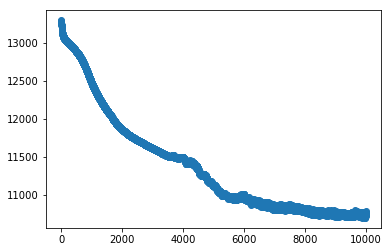

In [14]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors)

In [15]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(4791)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

In [16]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
outcomes_Variable_resized = outcomes_Variable.resize(4791)


# Make the FloatTensor into a numpy.array
outcomes_array = outcomes_Variable_resized.data.numpy()


# Make the numpy.array into a list
outcomes_list = outcomes_array.tolist()

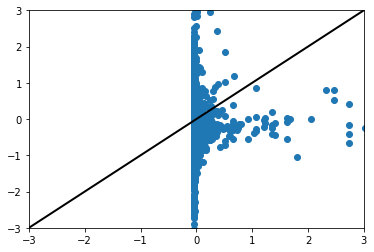

In [17]:
# Plot predictions versus training outcomes
plt.scatter(outcomes_list, y_pred_list)

axes = plt.gca()

axes.set_xlim([-3, 3])

axes.set_ylim([-3, 3])

plt.plot([-3, 3], [-3, 3], 'k-', lw=2)

### Round 1.1: Validation Set Performance

In [18]:
# Import data
valid_df = pd.read_csv("/home/jeremy/github_tornadoesr/data/raw/tor_cv_set_no_zeros.csv")


# Validation set outcomes
valid_outcomes = valid_df.iloc[:, [3]].astype(float)


# Make the validation outcomes into a numpy array
valid_outcomes_array = valid_outcomes.values


# Makes the numpy array into a torch Tensor
valid_outcomes_Tensor = torch.from_numpy(valid_outcomes_array)


# Changing validation outcomes from a DoubleTensor to a FloatTensor
valid_outcomes_Tensor = valid_outcomes_Tensor.float()


# Make the Tensor into a Pytorch Variable
valid_outcomes_Variable = Variable(valid_outcomes_Tensor)

In [19]:
# Validation set predictors
valid_predictors = valid_df.iloc[:,
                                 6:]

# Get rid of non-location and non-landcover variables
valid_predictors = valid_predictors.drop(["TOR_LENGTH",
                                          "TOR_WIDTH",
                                          "BEGIN_DATE_TIME",
                                          "YEAR",
                                          "CZ_NAME"],
                                         axis = 1)


# Make the validation predictors into a numpy array
valid_predictors_array = valid_predictors.values


# Makes the numpy array into a torch Tensor
valid_predictors_Tensor = torch.from_numpy(valid_predictors_array)


# Changing validation predictors from a DoubleTensor to a FloatTensor
valid_predictors_Tensor = valid_predictors_Tensor.float()


# Make the Tensor into a Pytorch Variable
valid_predictors_Variable = Variable(valid_predictors_Tensor)

In [20]:
# Have to make a new model and give it the train_model parameters to fix structure problem
dim_corrected_model = torch.nn.Sequential(torch.nn.Linear(18, 12),
                                          torch.nn.ReLU(),
                                          torch.nn.Linear(12, 1))


# Give the new model the old model's parameters
dim_corrected_model[(0)].weight = model[(0)].weight
dim_corrected_model[(2)].weight = model[(2)].weight


# Get the validation set predictions
y_valid_pred = dim_corrected_model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 15155.4941
[torch.FloatTensor of size 1]

In [21]:
valid_predictors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1623 entries, 0 to 1622
Data columns (total 18 columns):
BEGIN_LAT             1623 non-null float64
BEGIN_LON             1623 non-null float64
OPEN_WATER_PROP       1623 non-null float64
DEV_OPEN_PROP         1623 non-null float64
DEV_LOW_PROP          1623 non-null float64
DEV_MED_PROP          1623 non-null float64
DEV_HIGH_PROP         1623 non-null float64
DECID_FOREST_PROP     1623 non-null float64
EVERGR_FOREST_PROP    1623 non-null float64
MIXED_FOREST_PROP     1623 non-null float64
SHRUB_SCRUB_PROP      1623 non-null float64
GRASS_LAND_PROP       1623 non-null float64
PASTURE_HAY_PROP      1623 non-null float64
CULT_CROPS_PROP       1623 non-null float64
WOOD_WETLAND_PROP     1623 non-null float64
HERB_WETLAND_PROP     1623 non-null float64
BARREN_LAND_PROP      1623 non-null float64
ICE_SNOW_PROP         1623 non-null float64
dtypes: float64(18)
memory usage: 228.3 KB


In [22]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(1623)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

In [23]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
valid_outcomes_Variable_resized = valid_outcomes_Variable.resize(1623)


# Make the FloatTensor into a numpy.array
valid_outcomes_array = valid_outcomes_Variable_resized.data.numpy()


# Make the numpy.array into a list
valid_outcomes_list = valid_outcomes_array.tolist()

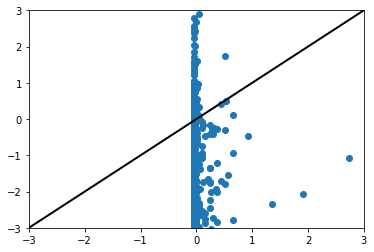

In [24]:
# Plot new predictions versus 'new' data
plt.scatter(valid_outcomes_list, y_valid_pred_list)

axes = plt.gca()

axes.set_xlim([-3, 3])

axes.set_ylim([-3, 3])

plt.plot([-3, 3], [-3, 3], 'k-', lw=2)

## Round 2: Two-Hidden-Layer Neural Network

In [25]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [26]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(18, 12),
                            torch.nn.ReLU(),
                            torch.nn.Linear(12, 8),
                            torch.nn.ReLU(),
                            torch.nn.Linear(8, 1))

In [27]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 5e-6


# Train the mode
for t in range(10000):
    
    # Get current predictions
    y_pred = model(features_Variable)
    
    # Compute and print current loss
    loss = loss_fn(y_pred, outcomes_Variable)
    print(t, loss.data[0])
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    model.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using gradient descent
    for param in model.parameters():
        param.data -= learning_rate * param.grad.data

0 13130.37890625
1 13129.095703125
2 13127.931640625
3 13126.9150390625
4 13126.0
5 13125.201171875
6 13124.5009765625
7 13123.8271484375
8 13123.2001953125
9 13122.712890625
10 13122.2265625
11 13121.7705078125
12 13121.4091796875
13 13121.0322265625
14 13120.708984375
15 13120.419921875
16 13120.15234375
17 13119.9228515625
18 13119.6982421875
19 13119.46484375
20 13119.2568359375
21 13119.0546875
22 13118.8828125
23 13118.7119140625
24 13118.5751953125
25 13118.466796875
26 13118.3330078125
27 13118.2294921875
28 13118.10546875
29 13117.9658203125
30 13117.8251953125
31 13117.7060546875
32 13117.6015625
33 13117.4873046875
34 13117.3779296875
35 13117.2900390625
36 13117.1904296875
37 13117.1318359375
38 13117.0341796875
39 13116.9404296875
40 13116.85546875
41 13116.771484375
42 13116.6962890625
43 13116.6181640625
44 13116.533203125
45 13116.453125
46 13116.40234375
47 13116.326171875
48 13116.265625
49 13116.1982421875
50 13116.13671875
51 13116.05859375
52 13115.9912109375
53 13

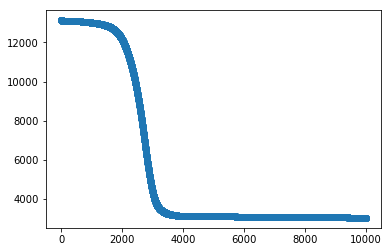

In [28]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors)

In [29]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(4791)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

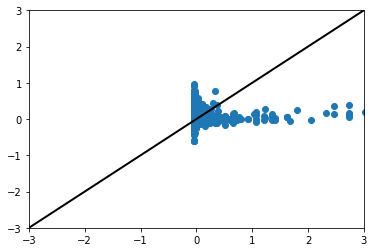

In [30]:
# Plot predictions versus training outcomes
plt.scatter(outcomes_list, y_pred_list)

axes = plt.gca()

axes.set_xlim([-3, 3])

axes.set_ylim([-3, 3])

plt.plot([-3, 3], [-3, 3], 'k-', lw=2)

### Round 2.1: Validation Set Performance

In [31]:
# Have to make a new model and give it the train_model parameters to fix structure problem
dim_corrected_model = torch.nn.Sequential(torch.nn.Linear(18, 12),
                                          torch.nn.ReLU(),
                                          torch.nn.Linear(12, 8),
                                          torch.nn.ReLU(),
                                          torch.nn.Linear(8, 1))


# Give the new model the old model's parameters
dim_corrected_model[(0)].weight = model[(0)].weight
dim_corrected_model[(2)].weight = model[(2)].weight
dim_corrected_model[(4)].weight = model[(4)].weight


# Get the validation set predictions
y_valid_pred = dim_corrected_model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 7174.8164
[torch.FloatTensor of size 1]

In [32]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(1623)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

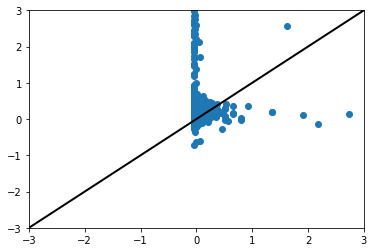

In [33]:
# Plot new predictions versus 'new' data
plt.scatter(valid_outcomes_list, y_valid_pred_list)

axes = plt.gca()

axes.set_xlim([-3, 3])

axes.set_ylim([-3, 3])

plt.plot([-3, 3], [-3, 3], 'k-', lw=2)

## Round 3: Linear Regression

In [34]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [35]:
# Make the neural network - really a regression
model = torch.nn.Sequential(torch.nn.Linear(18, 1))

In [36]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 1e-6


# Train the neural network
for t in range(10000):
    
    # Get the current prediction
    y_pred = model(features_Variable)
    
    # Compute and print loss
    loss = loss_fn(y_pred, outcomes_Variable)
    print(t, loss.data[0])
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass
    model.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using gradient descent
    for param in model.parameters():
        param.data -= learning_rate * param.grad.data

0 14210.1796875
1 14176.9384765625
2 14145.3759765625
3 14115.3857421875
4 14086.775390625
5 14059.578125
6 14033.6103515625
7 14008.85546875
8 13985.1884765625
9 13962.57421875
10 13940.9248046875
11 13920.220703125
12 13900.3466796875
13 13881.3427734375
14 13863.05859375
15 13845.52734375
16 13828.66796875
17 13812.4716796875
18 13796.8369140625
19 13781.826171875
20 13767.349609375
21 13753.3544921875
22 13739.9111328125
23 13726.8408203125
24 13714.2744140625
25 13702.111328125
26 13690.322265625
27 13678.939453125
28 13667.87890625
29 13657.1826171875
30 13646.8310546875
31 13636.7373046875
32 13626.9765625
33 13617.474609375
34 13608.228515625
35 13599.2431640625
36 13590.56640625
37 13582.0771484375
38 13573.7958984375
39 13565.7529296875
40 13557.9111328125
41 13550.28125
42 13542.828125
43 13535.5234375
44 13528.48046875
45 13521.552734375
46 13514.779296875
47 13508.193359375
48 13501.7529296875
49 13495.4541015625
50 13489.2763671875
51 13483.244140625
52 13477.396484375
53

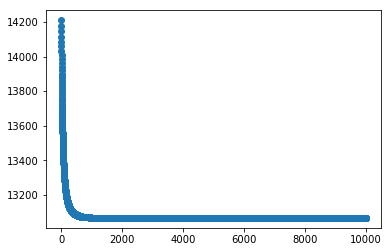

In [37]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors)

In [38]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(4791)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

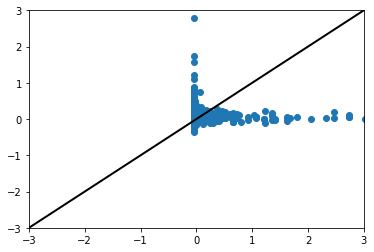

In [39]:
# Plot predictions versus training outcomes
plt.scatter(outcomes_list, y_pred_list)

axes = plt.gca()

axes.set_xlim([-3, 3])

axes.set_ylim([-3, 3])

plt.plot([-3, 3], [-3, 3], 'k-', lw=2)

### Round 3.1: Validation Set Performance

In [40]:
# Have to make a new model and give it the train_model parameters to fix structure problem
dim_corrected_model = torch.nn.Sequential(torch.nn.Linear(18, 1))


# Give the new model the old model's parameters
dim_corrected_model[(0)].weight = model[(0)].weight


# Get the validation set predictions
y_valid_pred = dim_corrected_model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 485.7505
[torch.FloatTensor of size 1]

In [41]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(1623)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

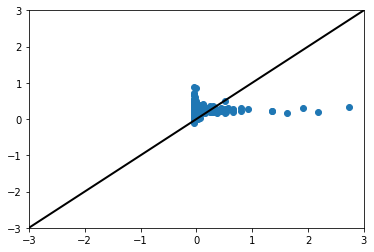

In [42]:
# Plot new predictions versus 'new' data
plt.scatter(valid_outcomes_list, y_valid_pred_list)

axes = plt.gca()

axes.set_xlim([-3, 3])

axes.set_ylim([-3, 3])

plt.plot([-3, 3], [-3, 3], 'k-', lw=2)